<a href="https://colab.research.google.com/github/dev-nanthan/random-forest-classifier/blob/main/random_forest_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Classifier for Predicting Loan Defaults based on Lending club Datasets

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline


## Import the Data as pandas DataFrame and explore its basic properties

In [2]:
loans = pd.read_csv('loan_data.csv')
loans.info()
loans.describe()
loans.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Exploratory Data Analysis (EDA)
Visualize the data to understand it better.


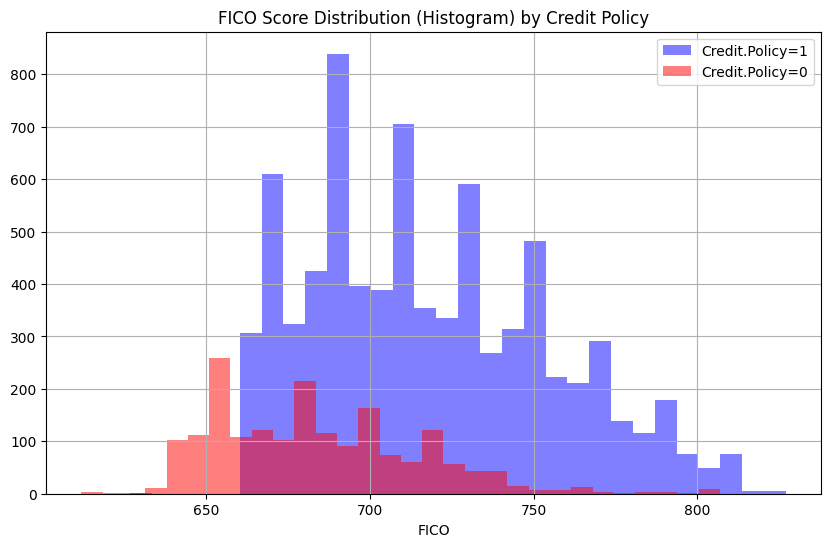

In [6]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5, color='blue', bins=30, label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5, color='red', bins=30, label='Credit.Policy=0')

# Add title
plt.title('FICO Score Distribution (Histogram) by Credit Policy')

# Add legend and label
plt.legend()
plt.xlabel('FICO')

# Display the plot
plt.show()


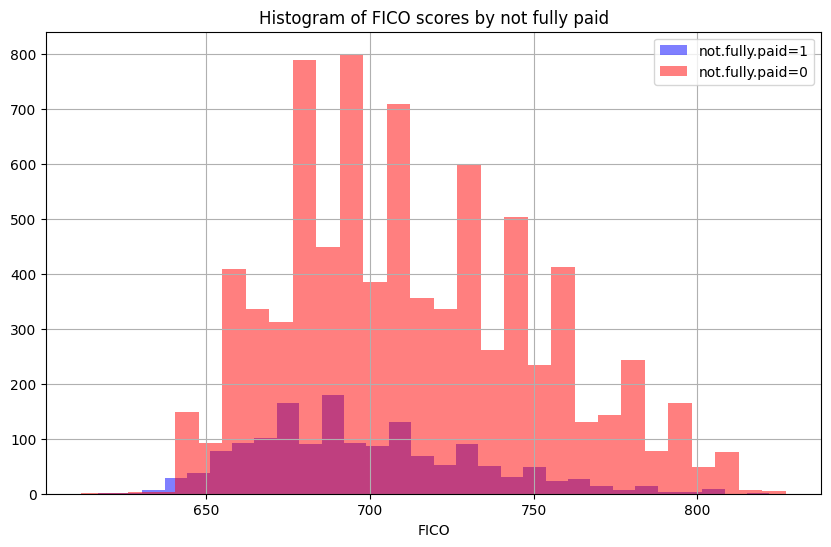

In [7]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5, color='blue', bins=30, label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5, color='red', bins=30, label='not.fully.paid=0')

plt.title('Histogram of FICO scores by not fully paid')
plt.legend()
plt.xlabel('FICO')
plt.show()

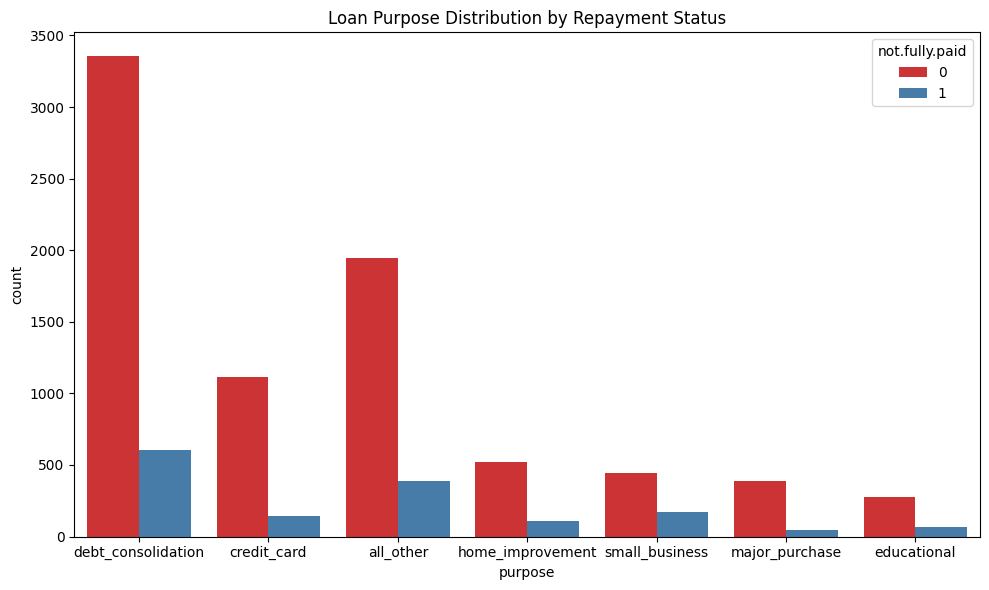

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(x='purpose', hue='not.fully.paid', data=loans, palette='Set1')
plt.title('Loan Purpose Distribution by Repayment Status')
plt.tight_layout()
plt.show()

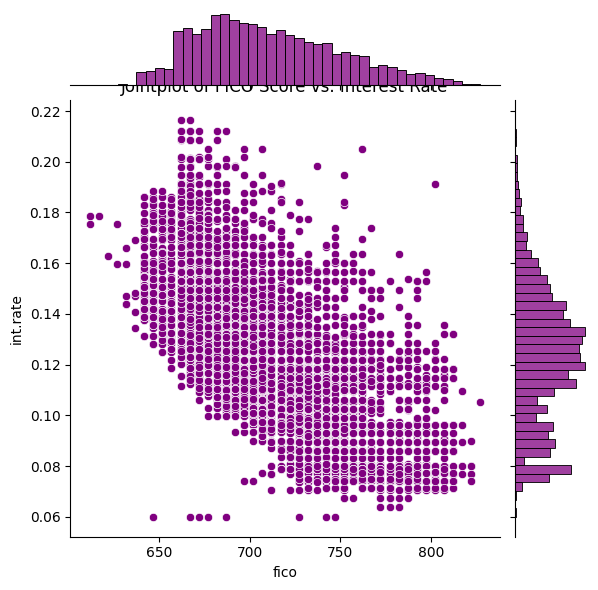

In [12]:
sns.jointplot(x='fico', y='int.rate', data=loans, color='purple')
plt.title('Jointplot of FICO Score vs. Interest Rate')
plt.show()


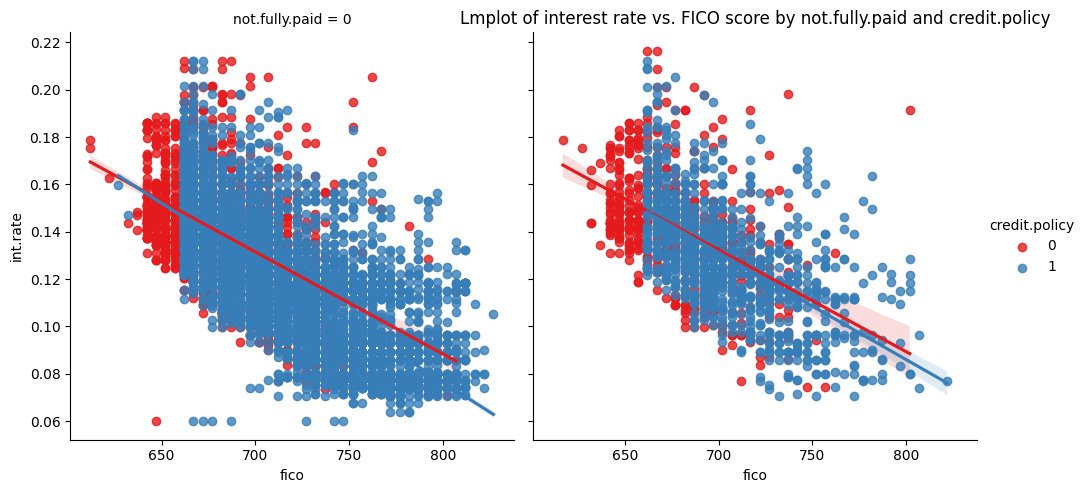

In [13]:
sns.lmplot(y='int.rate', x='fico', hue='credit.policy', col='not.fully.paid', data=loans, palette='Set1')
plt.title('Lmplot of interest rate vs. FICO score by not.fully.paid and credit.policy')
plt.show()